# HypLpRadon
The adjoint test for the hyperbolic Radon transform operator implemented with the log-polar coordinates

In [93]:
from numpy import *
import matplotlib.pyplot as plt
import sys
sys.path.append('build/lib.linux-x86_64-2.7/')
import hypRadonmods.hypRadon as hypRadon

In [94]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Specify the range of variable in time-offest (t,x) and hyperbolic (tau,q) domains

In [95]:
N=512;
Nx=N;Nt=N;Nq=N;Ntau=N;T0=0;T1=4;X1=5;
t=T0+arange(0,Nt)/float(Nt)*(T1-T0);x=arange(0,Nx)/float(Nx)*X1;
q=0.3+arange(0,Nq)/float(Nq)*0.8;tau=T0+arange(0,Ntau)/float(Ntau)*(T1-T0);
[t,x]=meshgrid(t,x);[q,tau]=meshgrid(q,tau);

Generate a synthetic data set (hyperbolas):

In [96]:
f=zeros([Nx,Nt],dtype=float32)
rickh = lambda t,cent,a: (1-2*pi**2*a**2*t**2)*exp(-pi**2*a**2*t**2);
ql=array([0.6,0.6,0.6,0.6,0.6,0.5,0.45,0.7])*amax(q);
tl=array([0.1,0.3,0.5,0.65,0.8,0.3,0.5,0.5])*(T1-T0)+T0;
for l in range(0,8):
        for j in range(0,Nx):
                f[j,:]=f[j,:]+rickh(t[0,:]-sqrt(tl[l]**2+ql[l]**2*x[j,0]**2),tl[l],6);
f=f*(t[0,1]-t[0,0]);
v=ones([Nx,Nt],dtype=float32);v[:,-16:]=tile(cos(linspace(0,1,16)*pi/2),[Nx,1]);
f=f*v;

Plot the tranposed data

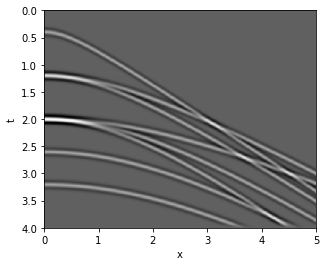

In [97]:
plt.imshow(np.transpose(f),extent=(0,5,4,0), cmap='Greys_r')
plt.ylabel('t')
plt.xlabel('x')
plt.show()

Specify the size of the log-polar grid (this has to be investigated, as well as additional splitting performed to solve the problem of small values t)

In [98]:
Ntheta=512
Nrho=512

Create a hypRadon class with precomputed parameters and GPU memory allocated

In [99]:
cl=hypRadon.hypRadon(t,x,q,tau,1,Ntheta,Nrho)# 1 - number of seismograms for simultenious processing

Evaluate the forward operator for the hyperbolic Radon transoform

In [100]:
R=cl.fwd(f)

Plot the result

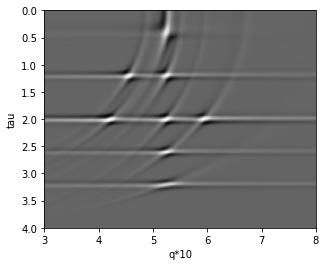

In [101]:
plt.imshow(R,extent=(3,8,4,0), cmap='Greys_r')
plt.ylabel('tau')
plt.xlabel('q*10')
plt.show()

Apply the adjoint operator to the result above

In [105]:
fa=cl.adj(R)

Plot the result

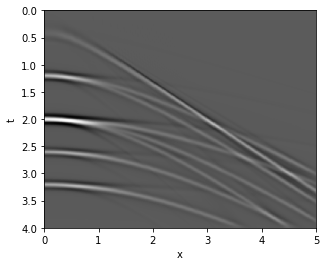

In [107]:
plt.imshow(np.transpose(fa),extent=(0,5,4,0), cmap='Greys_r')
plt.ylabel('t')
plt.xlabel('x')
plt.show()

Adjoint test

In [103]:
print (sum(fa*f)-sum(R*R))/sum(R*R)

-1.50158e-07
